In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
#import pandas_ta as ta
data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,759.429993,760.619995,756.840027,759.130005,759.130005,0
2012-03-13,761.450012,773.030029,761.450012,772.979980,772.979980,0
2012-03-14,773.190002,774.679993,769.280029,771.630005,771.630005,0
2012-03-15,772.380005,776.469971,770.739990,776.419983,776.419983,0
2012-03-16,776.559998,778.099976,775.640015,777.130005,777.130005,0
2012-03-19,777.119995,782.549988,776.070007,780.090027,780.090027,0
2012-03-20,778.030029,778.299988,773.119995,777.369995,777.369995,0
2012-03-21,777.559998,778.650024,774.760010,776.150024,776.150024,0
2012-03-22,773.640015,773.640015,768.000000,770.270020,770.270020,0


In [ ]:
# Adding indicators
#data['RSI']=ta.rsi(data.Close, length=15)
#data['EMAF']=ta.ema(data.Close, length=20)
#data['EMAM']=ta.ema(data.Close, length=100)
#data['EMAS']=ta.ema(data.Close, length=150)

#data['Target'] = data['Adj Close']-data.Open
#data['Target'] = data['Target'].shift(-1)

#data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

#data['TargetNextClose'] = data['Adj Close'].shift(-1)

#data.dropna(inplace=True)
#data.reset_index(inplace = True)
#data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
sp500  = yf.Ticker("^GSPC")
sp500 = sp500.history(period='max')

#sp500.plot.line(y='Close',use_index=True)

del sp500['Dividends']
del sp500['Stock Splits']
del sp500['Open']
del sp500['High']
del sp500['Low']
del sp500['Volume']

daysago = pd.DataFrame(dtype=object)
for i in range(100,-2,-1):
  daysago['{}dayago'.format(i)] = sp500['Close'].shift(i)

del sp500['Close']
data = pd.concat([sp500, daysago], axis=1)
data.head(10)

data = data.loc['1990-01-01':].copy()
data = data.drop(index=data.tail(1).index)
data.tail(5)
data.shape

/var/folders/xt/1mczr1b13kdcdq3krysb29x80000gn/T/ipykernel_75477/1707332387.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daysago['{}dayago'.format(i)] = sp500['Close'].shift(i)
/var/folders/xt/1mczr1b13kdcdq3krysb29x80000gn/T/ipykernel_75477/1707332387.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  daysago['{}dayago'.format(i)] = sp500['Close'].shift(i)


(8689, 102)

In [ ]:
data_set = data#.iloc[:, 0:101]#.values
pd.set_option('display.max_columns', None)

#print(data_set.head(20))
print(data_set.shape)
#print(data.shape)
#print(type(data_set))

(8689, 102)


In [ ]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.01103975 0.01132068 0.010486   ... 0.0111604  0.01237198 0.01219285]
 [0.01132068 0.01056796 0.01012852 ... 0.01237198 0.01219285 0.01159765]
 [0.01056796 0.01020769 0.01047962 ... 0.01219285 0.01159765 0.01092926]
 ...
 [0.98875869 1.         0.98888203 ... 0.99658485 0.9982414  0.99919876]
 [1.         0.99661177 0.99131201 ... 0.9982414  0.99919876 0.99488598]
 [0.99661177 0.99906075 1.         ... 0.99919876 0.99488598 0.99669085]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 10
#print(data_set_scaled.shape[0])
for j in range(102):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])
#print(X)
#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

[[[0.01103975 0.01132068 0.010486   ... 0.0111604  0.01237198 0.01219285]
  [0.01132068 0.01056796 0.01012852 ... 0.01237198 0.01219285 0.01159765]
  [0.01056796 0.01020769 0.01047962 ... 0.01219285 0.01159765 0.01092926]
  ...
  [0.0108446  0.00969517 0.00973062 ... 0.00998735 0.01022234 0.00856581]
  [0.00969517 0.00980668 0.01047749 ... 0.01022234 0.00856581 0.00800144]
  [0.00980668 0.01055939 0.01192867 ... 0.00856581 0.00800144 0.00872376]]

 [[0.01132068 0.01056796 0.01012852 ... 0.01237198 0.01219285 0.01159765]
  [0.01056796 0.01020769 0.01047962 ... 0.01219285 0.01159765 0.01092926]
  [0.01020769 0.01056153 0.01068176 ... 0.01159765 0.01092926 0.01123553]
  ...
  [0.00969517 0.00980668 0.01047749 ... 0.01022234 0.00856581 0.00800144]
  [0.00980668 0.01055939 0.01192867 ... 0.00856581 0.00800144 0.00872376]
  [0.01055939 0.01202192 0.01171589 ... 0.00800144 0.00872376 0.00807848]]

 [[0.01056796 0.01020769 0.01047962 ... 0.01219285 0.01159765 0.01092926]
  [0.01020769 0.010561

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

6943
(6943, 10, 102)
(1736, 10, 102)
(6943, 1)
(1736, 1)
[[0.00807848]
 [0.00823065]
 [0.00841557]
 ...
 [0.42031797]
 [0.41927587]
 [0.42017543]]


In [ ]:
#!pip install optree
#!pip install keras
#import optree
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf

from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 102), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0032 - val_loss: 1.3962e-04
Epoch 2/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 6.1419e-05 - val_loss: 7.8951e-05
Epoch 3/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.3893e-05 - val_loss: 5.2458e-05
Epoch 4/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.5636e-05 - val_loss: 2.4230e-04
Epoch 5/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.3655e-05 - val_loss: 5.7800e-05
Epoch 6/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.1276e-05 - val_loss: 7.4662e-05
Epoch 7/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.5871e-05 - val_loss: 5.6596e-05
Epoch 8/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 3.1175e-05 - val_loss: 8.9499e-04
Epoch 9/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.9222e-05 - val_loss: 7.9151e-05
Epoch 10/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.6448e-05 - val_loss: 5.2438e-05
Epoch 11/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[0.4245217] [0.42096129]
[0.4249913] [0.4198075]
[0.42433503] [0.41963416]
[0.42414474] [0.41273643]
[0.41808534] [0.4133355]
[0.41887295] [0.41805854]
[0.42339984] [0.41782162]
[0.4236893] [0.41849579]
[0.4241357] [0.41115695]
[0.41833553] [0.41029788]


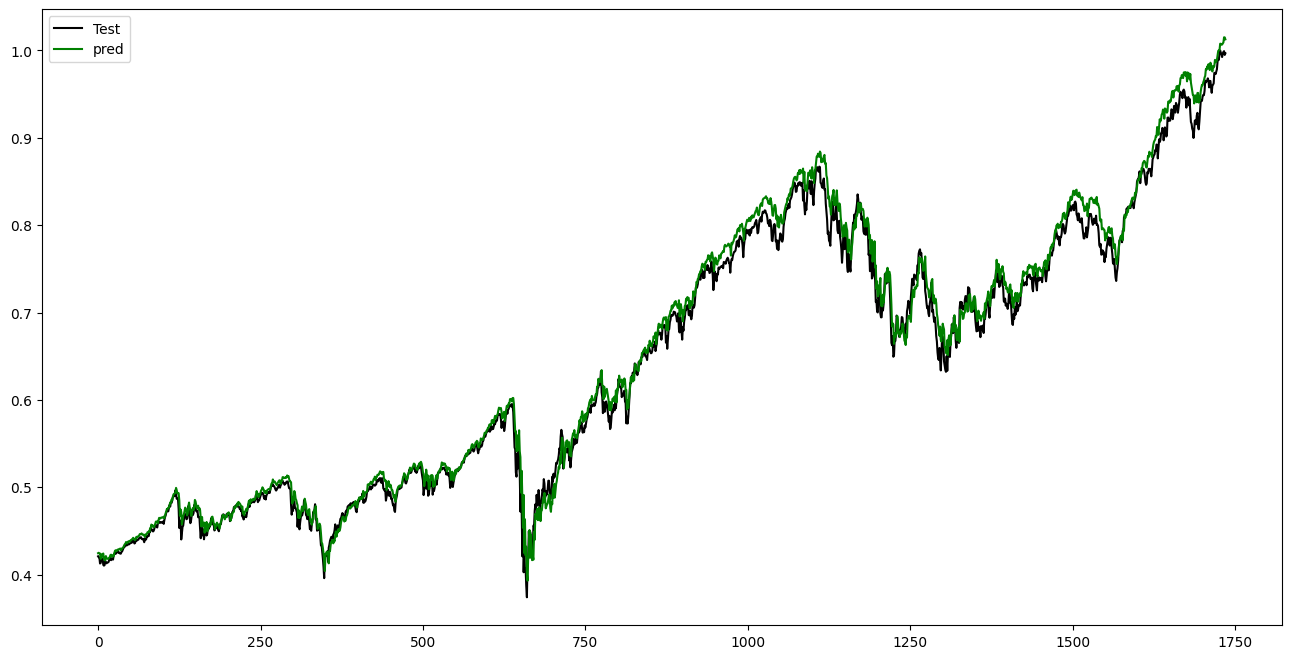

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
avg_error = (np.sum(np.sqrt((y_test - y_pred)**2)))/len(y_test)*100
print(np.sum(np.sqrt((y_test - y_pred)**2)))
print(y_test, y_pred)
avg_error


20.0825602207493
[[0.42096129]
 [0.4198075 ]
 [0.41963416]
 ...
 [0.99919876]
 [0.99488598]
 [0.99669085]] [[0.4245217 ]
 [0.4249913 ]
 [0.42433503]
 ...
 [1.0150903 ]
 [1.014936  ]
 [1.0127325 ]]


1.1568295058035312

In [13]:
avg_error_array = []
backcandle_avg_array = []
for backcandles in range(1,10):
    for i in range(1,5): 
      X = []
      for j in range(102):#data_set_scaled[0].size):#2 columns are target not X
        X.append([])
        for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
            X[j].append(data_set_scaled[i-backcandles:i, j])
      X=np.moveaxis(X, [0], [2])
      X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
      y=np.reshape(yi,(len(yi),1))
      splitlimit = int(len(X)*0.8)
      X_train, X_test = X[:splitlimit], X[splitlimit:]
      y_train, y_test = y[:splitlimit], y[splitlimit:]
      lstm_input = Input(shape=(backcandles, 102), name='lstm_input')
      inputs = LSTM(150, name='first_layer')(lstm_input)
      inputs = Dense(1, name='dense_layer')(inputs)
      output = Activation('linear', name='output')(inputs)
      model = Model(inputs=lstm_input, outputs=output)
      adam = optimizers.Adam()
      model.compile(optimizer=adam, loss='mse')
      model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)
      y_pred = model.predict(X_test)
      avg_error = (np.sum(np.sqrt((y_test - y_pred)**2)))/len(y_test)*100
      avg_error_array.append(avg_error)
    backcandle_avg = np.mean(avg_error_array)
    backcandle_avg_array.append(backcandle_avg)
    
print(backcandle_avg_array)

Epoch 1/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0020 - val_loss: 8.8564e-05
Epoch 2/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.7080e-05 - val_loss: 9.9026e-05
Epoch 3/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1703e-05 - val_loss: 1.8940e-04
Epoch 4/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9674e-05 - val_loss: 7.6219e-05
Epoch 5/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.6955e-05 - val_loss: 1.5123e-04
Epoch 6/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9460e-05 - val_loss: 3.1374e-05
Epoch 7/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3498e-05 - val_loss: 2.8873e-05
Epoch 8/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3283e-05 - val_loss: 3.4559e-05
Epoch 9/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5939e-05 - val_loss: 2.8598e-05
Epoch 10/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1607e-05 - val_loss: 1.8491e-04
Epoch 11/30
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.

KeyboardInterrupt: 

In [ ]:
plt.plot(backcandle_avg_array)


In [ ]:
hardcode_array = [6.671783194915661, 9.747046629233619, 2.5436865895092473, 4.676847428775324, 1.6453430352434466, 1.4854276721271327, 2.554387954102473, 1.6998273906142016, 0.7655917903743081, 1.0623174429617726, 0.6723523368971414, 5.05866365308429, 1.1328844833828045, 0.8811976218670227, 2.423009022976239, 1.284364392889646, 0.7885525280621829, 8.701979171229018, 2.6289916833316087, 1.0716338560636982, 1.166775497791495, 1.579368047395737, 0.9766534920487282, 1.5712059023742522, 5.24098087348706, 2.1303520731199947, 10.674838075633915, 6.1601257556988065, 2.1558035105930338, 5.3431876851206495, 9.932915505572625, 2.954759124932127, 2.581878897020912, 4.515021072582514, 1.9456635276936234, 2.2598907564094612, 2.1060121737844857, 2.472736419066114, 4.349664804811232, 3.8137648209633217, 4.26649540444255, 1.9243753160367305, 3.8949327803558385, 3.8063781338364904, 2.2300966191497076, 1.8304886753600476, 1.8926813464436452, 3.3239644575616394, 2.451378057485158, 3.352520307229817, 1.8150312157252717, 3.3196082917046095, 1.358421988969335, 2.705167275165877, 2.349108785446472, 2.347180309744397, 1.6944992371198433, 1.3984646612200269, 1.3871914590024628, 2.7025187935076067, 2.790507147003722, 3.5900310781974976, 2.454281809769362, 4.7496788919652415, 4.879788259138375, 2.025398546503378, 4.049790731754018, 3.8777450946955083, 6.422102515577564, 4.771600525912777, 1.6922410304889797, 1.4219582680925729, 7.385366698171938, 2.161851228136155, 2.5802676709286785, 1.1396714515947344, 4.531176673170552, 4.380903314038609, 6.867057132060515, 4.91471498795782, 2.518849123756857, 3.3542148767247113, 4.628767963546694, 3.393964871037855, 6.021193534315417, 2.426945081529201, 2.1142730503130647, 8.89981647234929, 1.4904735004164276, 1.6149182097547632, 3.59210935699335, 1.8022856589592435, 2.3703681345603105, 3.0587337904743688, 1.8640514795168044, 2.1333566939581603, 3.563470069592626, 0.8116500674465412, 3.510246504643754]
print(min(hardcode_array))
hardcode_array.index(0.6723523368971414)